In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


In [2]:
file_path = r"C:\Users\anand\Downloads\wine+quality\winequality-red.csv"
red_wine = pd.read_csv(file_path, sep=";")
print(red_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(red_wine.info())
print(red_wine.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [4]:
X = red_wine.drop(columns=["quality"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  


In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance (PC1, PC2): {explained_variance}")


Explained Variance (PC1, PC2): [0.28173931 0.1750827 ]


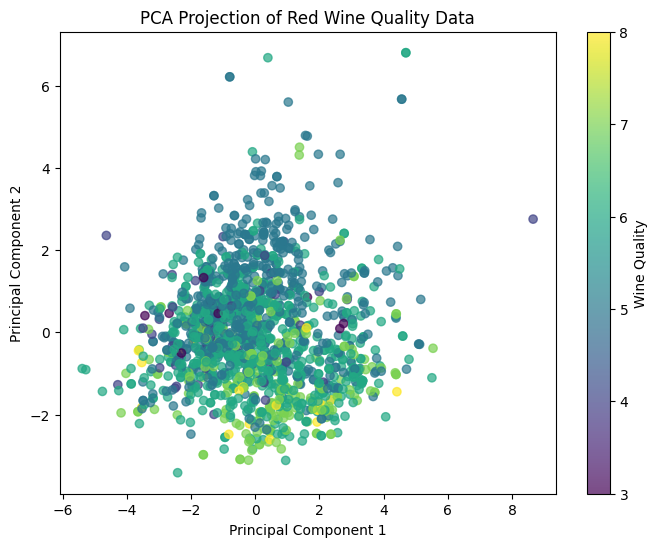

In [6]:

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=red_wine["quality"], cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Wine Quality")
plt.title("PCA Projection of Red Wine Quality Data")
plt.show()


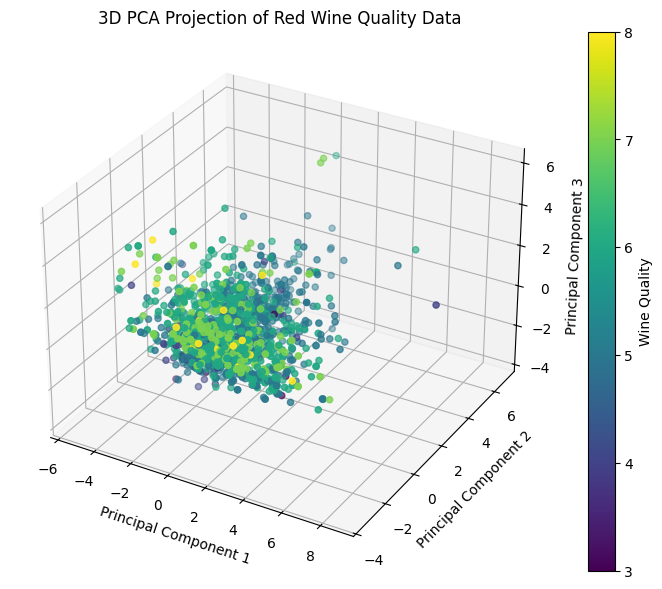

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                c=red_wine["quality"], cmap='viridis')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection of Red Wine Quality Data")
plt.colorbar(sc, label="Wine Quality")
plt.show()


PC1 explained 28.17% of the variance and PC2 explained 17.51%, meaning together, they retained 45.67% of the total variance. This means that 54.33% of the original information was lost when reducing from 11 features to 2. While this allows for easier visualization and computation, some important details may be missing. When extending PCA to three components, the 3D PCA plot showed a better distribution of variance but still lacked clear clustering. The trade-off is that using fewer components simplifies the data but loses information, while using more components retains more variance but increases complexity.

In [7]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

In [8]:
print(X_tsne[:5])


[[-41.600174   17.456373 ]
 [-22.86949    33.12632  ]
 [-22.704964   31.576172 ]
 [ 35.321644    1.5396777]
 [-41.496197   17.767351 ]]


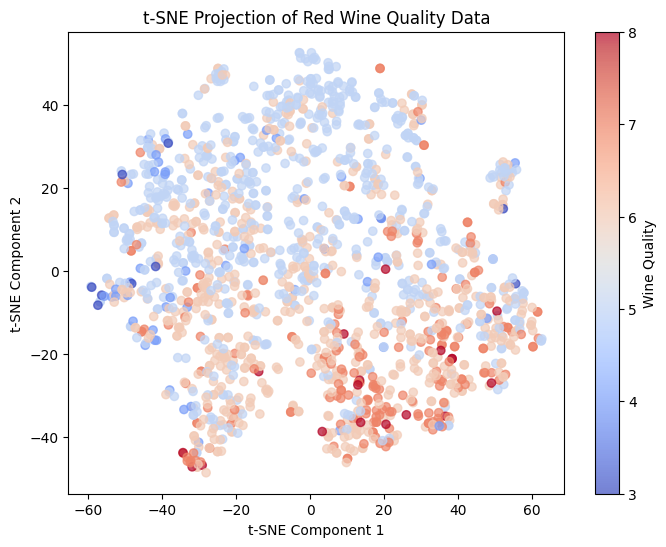

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=red_wine["quality"], cmap='coolwarm', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Wine Quality")
plt.title("t-SNE Projection of Red Wine Quality Data")
plt.show()


3.2
PCA reduces dimensionality while preserving the global structure of the data, making it easy to interpret. However, in our dataset, PCA did not clearly separate wine quality groups in either 2D or 3D visualizations, as most points overlapped. t-SNE, on the other hand, focused on local structures and formed distinct clusters in its 2D representation. This confirms that t-SNE is better suited for clustering high-dimensional data, while PCA is more useful for retaining variance and simplifying data for interpretation.

3.3
PCA is a linear method that transforms the data into a lower-dimensional space while maintaining variance, making it useful for understanding overall data trends. However, PCA does not capture nonlinear relationships well, leading to overlapping clusters. t-SNE, being nonlinear, is more effective at grouping similar data points together, as shown in its 2D visualization. While t-SNE revealed clearer clusters, it does not preserve global distances and requires more computation time, making it harder to interpret than PCA.

 PCA is better for structured dimensionality reduction and interpretability, while t-SNE is superior for clustering and revealing hidden relationships.